In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 


In [0]:
tokenizer = Tokenizer()

data = open('FILE.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 11, 100)           167400    
_________________________________________________________________
bidirectional (Bidirectional (None, 11, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 11, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 837)               84537     
_________________________________________________________________
dense_1 (Dense)              (None, 1674)              1402812   
Total params: 2,116,349
Trainable params: 2,116,349
Non-trainable params: 0
______________________________________________

In [8]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
121/121 [==============================] - 1s 10ms/step - loss: 7.3262 - accuracy: 0.0528
Epoch 2/100
121/121 [==============================] - 1s 9ms/step - loss: 6.3739 - accuracy: 0.0561
Epoch 3/100
121/121 [==============================] - 1s 9ms/step - loss: 6.1901 - accuracy: 0.0561
Epoch 4/100
121/121 [==============================] - 1s 9ms/step - loss: 6.1126 - accuracy: 0.0520
Epoch 5/100
121/121 [==============================] - 1s 9ms/step - loss: 6.0130 - accuracy: 0.0598
Epoch 6/100
121/121 [==============================] - 1s 9ms/step - loss: 5.9170 - accuracy: 0.0623
Epoch 7/100
121/121 [==============================] - 1s 9ms/step - loss: 5.8486 - accuracy: 0.0618
Epoch 8/100
121/121 [==============================] - 1s 9ms/step - loss: 5.7938 - accuracy: 0.0657
Epoch 9/100
121/121 [==============================] - 1s 9ms/step - loss: 5.7312 - accuracy: 0.0709
Epoch 10/100
121/121 [==============================] - 1s 9ms/step - loss: 5.6810 - accur

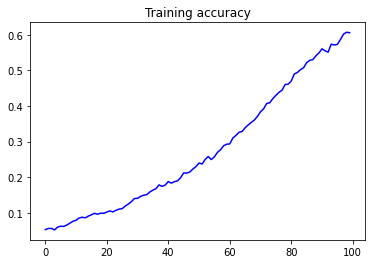

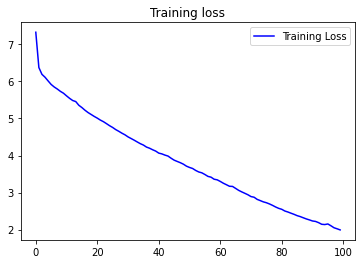

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [14]:
seed_text = " You are my  only hope in this life"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

 You are my  only hope in this life to know us might day fall up in our society stops us race in your heart so world and loved dwelling fall a thread to fall my life is the world to madness but a song to fall up at the old petal chief so fries to hold on fall fall fall fall on your hair eyes weeping worth on our brains that it's the thread fall to be known as fall up on the mountain so can get never his band to the way fall the song to the thread on a wooden pane to be sung of life
